## Курсовой проект

**Задача**

Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.

**Наименование файлов с данными**

course_project_train.csv - обучающий датасет<br>
course_project_test.csv - тестовый датасет

**Целевая переменная**

Credit Default - факт невыполнения кредитных обязательств

**Метрика качества**

F1-score (sklearn.metrics.f1_score)

**Требования к решению**

*Целевая метрика*
* F1 > 0.5
* Метрика оценивается по качеству прогноза для главного класса (1 - просрочка по кредиту)

*Решение должно содержать*
1. Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}\_solution.ipynb, пример SShirkin\_solution.ipynb
2. Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}\_predictions.csv, пример SShirkin\_predictions.csv

*Рекомендации для файла с кодом (ipynb)*
1. Файл должен содержать заголовки и комментарии (markdown)
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. Допускается применение библиотек Python и моделей машинного обучения,
которые были в данном курсе.

---

### Подгружаем датасеты

In [1544]:
import numpy as np
import pandas as pd

TRAIN_DATASET_PATH = 'course_project_train.csv'
TEST_DATASET_PATH = 'course_project_test.csv'

df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_test = pd.read_csv(TEST_DATASET_PATH)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [1545]:
df_train.shape

(7500, 17)

In [1546]:
df_test.shape

(2500, 16)

---

### Обработка пропусков

In [1547]:
df_train.isna().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [1548]:
medians = df_train[['Annual Income', 'Months since last delinquent', 'Credit Score']].median()
df_train[['Annual Income', 'Months since last delinquent', 'Credit Score']] = \
        df_train[['Annual Income', 'Months since last delinquent', 'Credit Score']].fillna(medians)
for column in ['Years in current job', 'Bankruptcies']:
    df_train[column].fillna(df_train[column].mode()[0], inplace=True)

df_train.isna().sum()

Home Ownership                  0
Annual Income                   0
Years in current job            0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    0
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
Credit Default                  0
dtype: int64

In [1549]:
df_test.isna().sum()

Home Ownership                     0
Annual Income                    513
Years in current job              86
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    1358
Bankruptcies                       3
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                     513
dtype: int64

In [1550]:
medians = df_test[['Annual Income', 'Months since last delinquent', 'Credit Score']].median()
df_test[['Annual Income', 'Months since last delinquent', 'Credit Score']] = \
        df_test[['Annual Income', 'Months since last delinquent', 'Credit Score']].fillna(medians)
for column in ['Years in current job', 'Bankruptcies']:
    df_test[column].fillna(df_test[column].mode()[0], inplace=True)
    
df_test.isna().sum()

Home Ownership                  0
Annual Income                   0
Years in current job            0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    0
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
dtype: int64

---

### Анализ численных переменных

In [1551]:
df_train.dtypes

Home Ownership                   object
Annual Income                   float64
Years in current job             object
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Credit Default                    int64
dtype: object

array([[<AxesSubplot:title={'center':'Annual Income'}>,
        <AxesSubplot:title={'center':'Tax Liens'}>,
        <AxesSubplot:title={'center':'Number of Open Accounts'}>],
       [<AxesSubplot:title={'center':'Years of Credit History'}>,
        <AxesSubplot:title={'center':'Maximum Open Credit'}>,
        <AxesSubplot:title={'center':'Number of Credit Problems'}>],
       [<AxesSubplot:title={'center':'Months since last delinquent'}>,
        <AxesSubplot:title={'center':'Bankruptcies'}>,
        <AxesSubplot:title={'center':'Current Loan Amount'}>],
       [<AxesSubplot:title={'center':'Current Credit Balance'}>,
        <AxesSubplot:title={'center':'Monthly Debt'}>,
        <AxesSubplot:title={'center':'Credit Score'}>]], dtype=object)

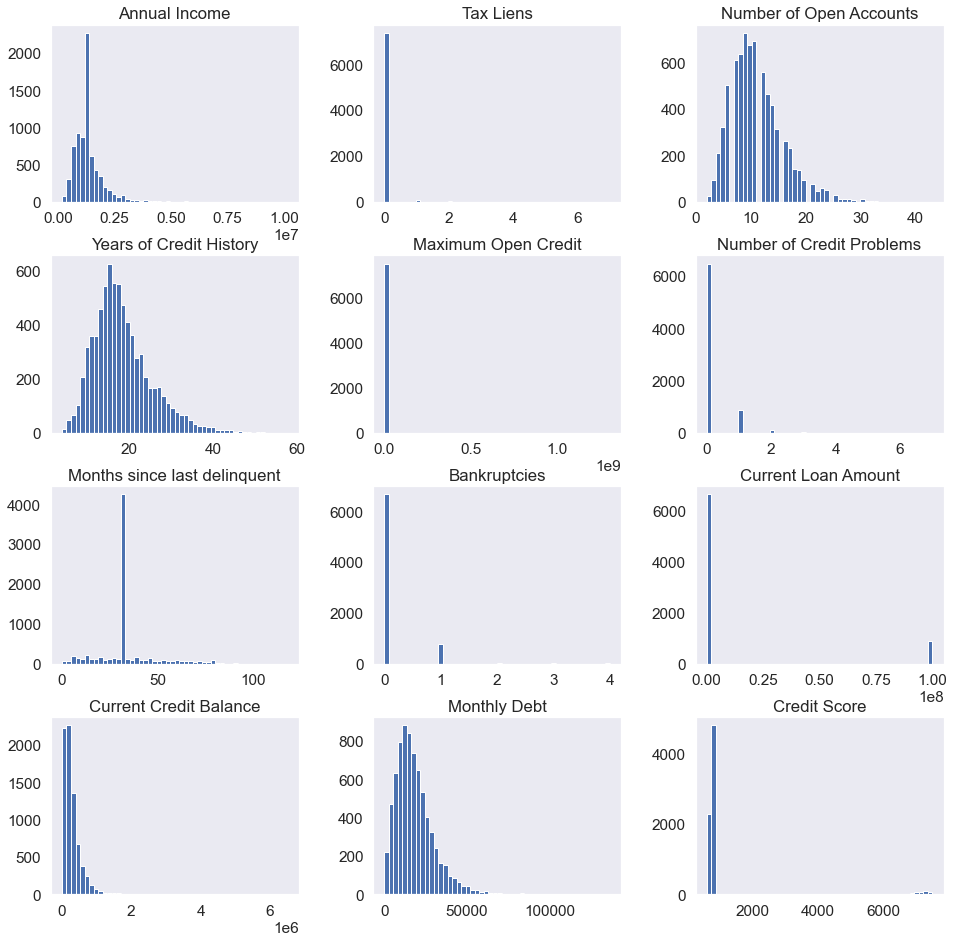

In [1552]:
import matplotlib.pyplot as plt
df_num_features = df_train.select_dtypes(include=['float64'])
df_num_features.hist(figsize=(16,16), bins=50, grid=False)

<span style="color:blue">*В некоторых графиках много раз повторяется одно значение - это мы заполнили медианой. Большинство остальных выглядят нормально (где плавное изменение или сохраняется логика). Посмотрим ближе Maximum Open Credit, Current Loan Amount, Current Credit Balance и Credit Score.*</span>

In [1553]:
df_train['Maximum Open Credit'].value_counts()

0.0         65
319110.0     5
246224.0     3
344058.0     3
513524.0     3
            ..
668360.0     1
642224.0     1
779372.0     1
372812.0     1
480832.0     1
Name: Maximum Open Credit, Length: 6963, dtype: int64

In [1554]:
df_train['Current Loan Amount'].value_counts()

99999999.0    870
218064.0        6
89298.0         6
222926.0        5
265826.0        5
             ... 
351626.0        1
212498.0        1
187682.0        1
108922.0        1
26928.0         1
Name: Current Loan Amount, Length: 5386, dtype: int64

<span style="color:blue">*Здесь странно - у 870 чел. текущий займ - это нереально большое значение. Вероятнее всего, им просто заполнили.*</span>

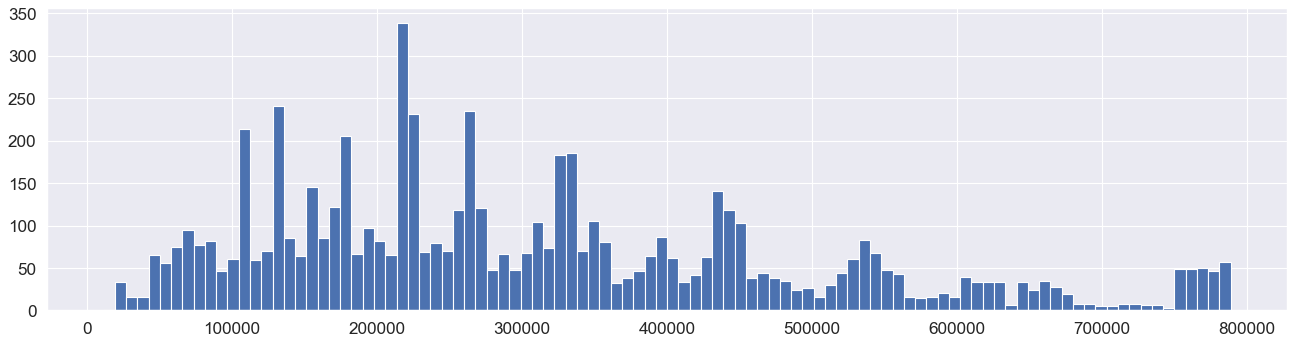

In [1555]:
plt.figure(figsize=(20, 5), dpi=80)
plt.hist(df_train['Current Loan Amount'][df_train['Current Loan Amount'] < 99999999.0], bins = 100)
plt.show()

<span style="color:blue">*По логике, хотели заполненным полем 99999999.0 показать, что займ есть, но неизвестно, какой. Заполним его медианой.*</span>

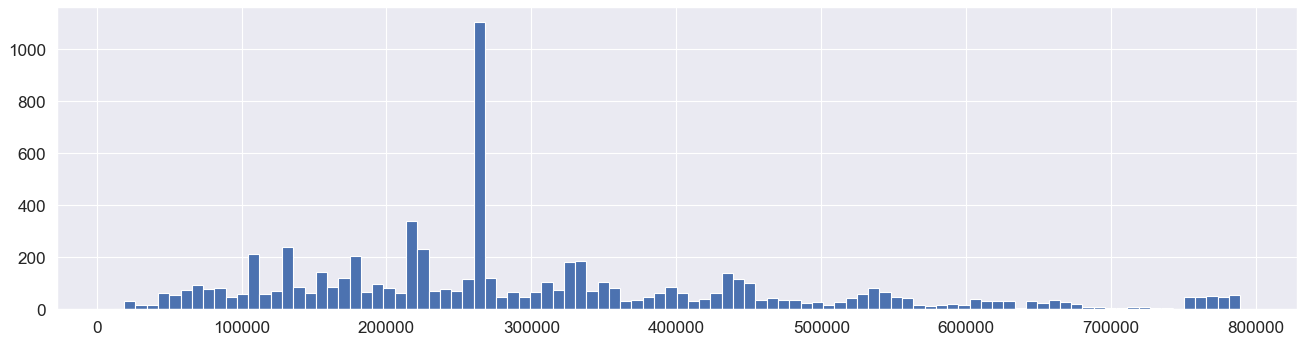

In [1556]:
medi = df_train['Current Loan Amount'][df_train['Current Loan Amount'] < 99999999.0].median()
df_train['Current Loan Amount'] = df_train['Current Loan Amount'].replace(99999999.0, medi)
plt.figure(figsize=(20, 5), dpi=80)
plt.hist(df_train['Current Loan Amount'], bins = 100)
plt.show()

<span style="color:blue">*Посмотрим в тестовом.*</span>

In [1557]:
df_test['Current Loan Amount'].value_counts()

99999999.0    297
269544.0        3
264638.0        3
327404.0        3
110462.0        3
             ... 
445016.0        1
142824.0        1
494010.0        1
439472.0        1
763004.0        1
Name: Current Loan Amount, Length: 2026, dtype: int64

<span style="color:blue">*Та же история.*</span>

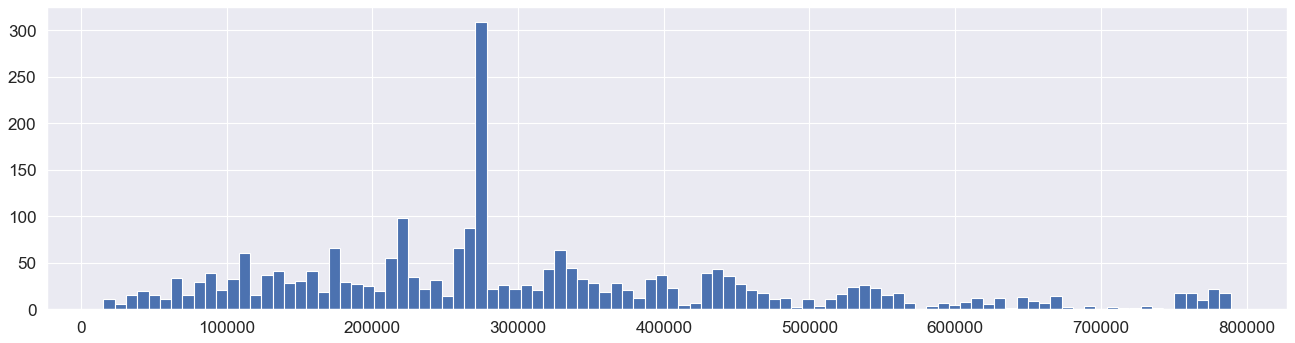

In [1558]:
medi = df_test['Current Loan Amount'][df_test['Current Loan Amount'] < 99999999.0].median()
df_test['Current Loan Amount'] = df_test['Current Loan Amount'].replace(99999999.0, medi)
plt.figure(figsize=(20, 5), dpi=80)
plt.hist(df_test['Current Loan Amount'], bins = 100)
plt.show()

In [1559]:
df_train['Current Credit Balance'].value_counts()

0.0         53
191710.0     5
106818.0     4
83638.0      4
136401.0     4
            ..
445360.0     1
243371.0     1
25688.0      1
62054.0      1
288192.0     1
Name: Current Credit Balance, Length: 6592, dtype: int64

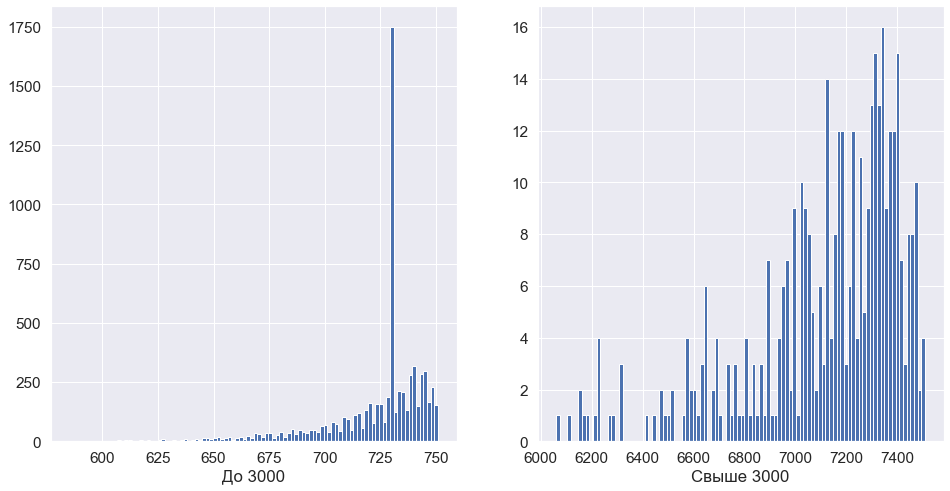

In [1560]:
plt.figure(figsize = (16, 8))
plt.subplot(121)
df_train['Credit Score'][df_train['Credit Score'] < 3000].hist(density=False, bins=100)
plt.xlabel('До 3000')

plt.subplot(122)
df_train['Credit Score'][df_train['Credit Score'] >= 3000].hist(density=False, bins=100)
plt.xlabel('Свыше 3000')
plt.show()

<span style="color:blue">*Здесь точно ошибка в данных. Нормальные значения - те, что слева. Их очень много, и они в промежутке до 750. А те, что справа - явно ошибочные - ровно в 10 раз больше. Уменьшим эти значения.*</span>

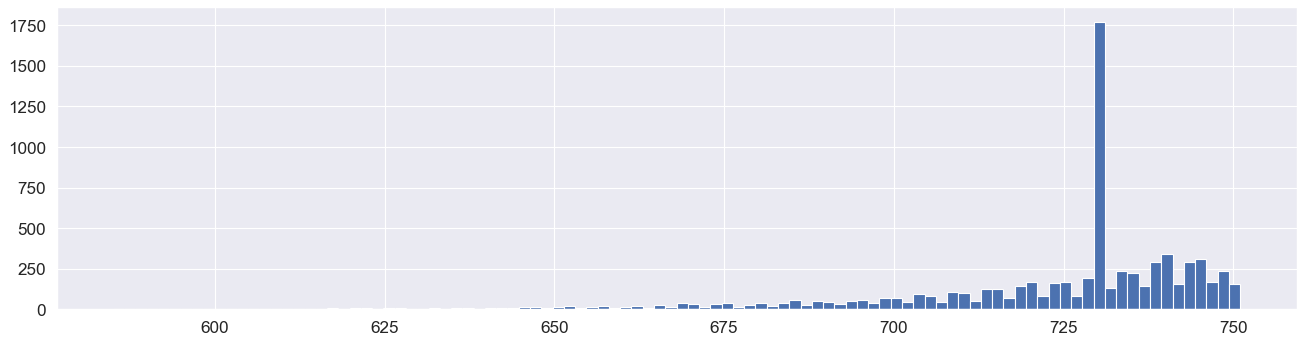

In [1561]:
new_credit_score = df_train['Credit Score'][df_train['Credit Score'] >= 3000].div(10)
df_train.loc[df_train['Credit Score'] >= 3000, 'Credit Score'] = new_credit_score
plt.figure(figsize=(20, 5), dpi=80)
plt.hist(df_train['Credit Score'], bins = 100)
plt.show()

<span style="color:blue">*И в тестовом то же.*</span>

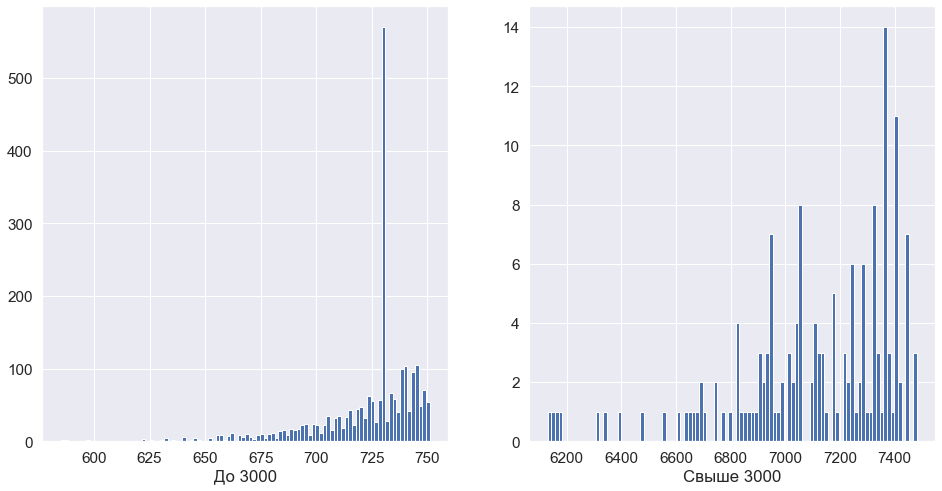

In [1562]:
plt.figure(figsize = (16, 8))
plt.subplot(121)
df_test['Credit Score'][df_test['Credit Score'] < 3000].hist(density=False, bins=100)
plt.xlabel('До 3000')

plt.subplot(122)
df_test['Credit Score'][df_test['Credit Score'] >= 3000].hist(density=False, bins=100)
plt.xlabel('Свыше 3000')
plt.show()

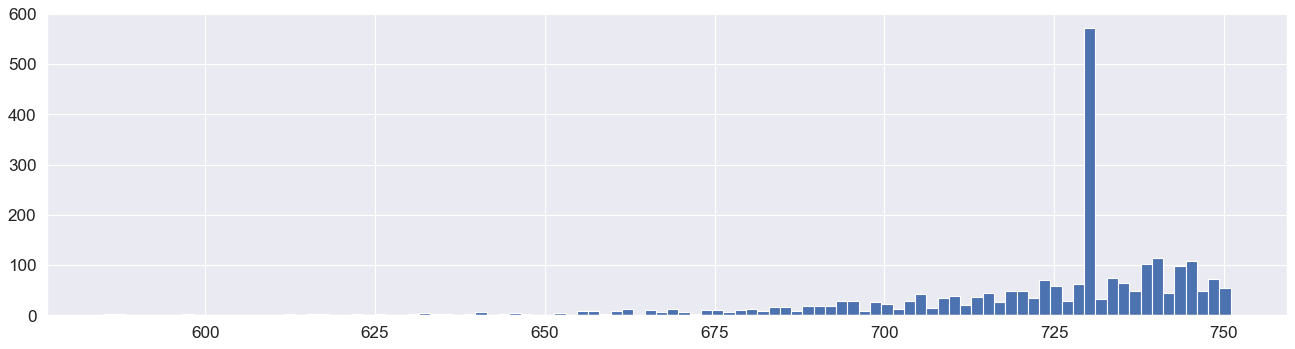

In [1563]:
new_credit_score = df_test['Credit Score'][df_test['Credit Score'] >= 3000].div(10)
df_test.loc[df_test['Credit Score'] >= 3000, 'Credit Score'] = new_credit_score
plt.figure(figsize=(20, 5), dpi=80)
plt.hist(df_test['Credit Score'], bins = 100)
plt.show()

---

### Анализ категориальных переменных

In [1564]:
df_train.groupby(['Home Ownership'])['Home Ownership'].count()

Home Ownership
Have Mortgage      12
Home Mortgage    3637
Own Home          647
Rent             3204
Name: Home Ownership, dtype: int64

<span style="color:blue">*Have Mortgage - опечатка.*</span>

In [1565]:
df_train['Home Ownership'] = df_train['Home Ownership'].replace('Have Mortgage','Home Mortgage')
df2 = df_train.groupby(['Home Ownership'])['Home Ownership'].count()
df2

Home Ownership
Home Mortgage    3649
Own Home          647
Rent             3204
Name: Home Ownership, dtype: int64

<span style="color:blue">*Параллельно преобразовываем в дамми.*</span>

In [1566]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Home Ownership'])], axis=1)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Home Mortgage,Own Home,Rent
0,Own Home,482087.0,10+ years,0.0,11.0,26.3,685960.0,1.0,32.0,1.0,debt consolidation,Short Term,265826.0,47386.0,7914.0,749.0,0,0,1,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,32.0,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1,0,1,0
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,32.0,0.0,debt consolidation,Short Term,265826.0,308389.0,13651.0,742.0,0,1,0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,32.0,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0,0,1,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,32.0,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0,0,0,1


<span style="color:blue">*То же в тестовом.*</span>

In [1567]:
df_test.groupby(['Home Ownership'])['Home Ownership'].count()

Home Ownership
Have Mortgage       7
Home Mortgage    1225
Own Home          248
Rent             1020
Name: Home Ownership, dtype: int64

In [1568]:
df_test['Home Ownership'] = df_test['Home Ownership'].replace('Have Mortgage','Home Mortgage')
df2 = df_test.groupby(['Home Ownership'])['Home Ownership'].count()
df_test = pd.concat([df_test, pd.get_dummies(df_test['Home Ownership'])], axis=1)
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Home Mortgage,Own Home,Rent
0,Rent,1178475.0,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,731.0,0,0,1
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0,0,0,1
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,30.0,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,726.0,1,0,0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0,1,0,0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,30.0,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0,1,0,0


<span style="color:blue">*Далее.*</span>

In [1569]:
df_train.groupby(['Years in current job'])['Years in current job'].count()

Years in current job
1 year        504
10+ years    2703
2 years       705
3 years       620
4 years       469
5 years       516
6 years       426
7 years       396
8 years       339
9 years       259
< 1 year      563
Name: Years in current job, dtype: int64

<span style="color:blue">*Переводим в численные значения.*</span>

In [1570]:
def years_to_cat(X):

    X['Years Cat'] = 0

    X.loc[X['Years in current job'] == '< 1 year', 'Years Cat'] = 0
    X.loc[X['Years in current job'] == '1 year', 'Years Cat'] = 1
    X.loc[X['Years in current job'] == '2 years', 'Years Cat'] = 2
    X.loc[X['Years in current job'] == '3 years', 'Years Cat'] = 3
    X.loc[X['Years in current job'] == '4 years', 'Years Cat'] = 4
    X.loc[X['Years in current job'] == '5 years', 'Years Cat'] = 5
    X.loc[X['Years in current job'] == '6 years', 'Years Cat'] = 6
    X.loc[X['Years in current job'] == '7 years', 'Years Cat'] = 7
    X.loc[X['Years in current job'] == '8 years', 'Years Cat'] = 8
    X.loc[X['Years in current job'] == '9 years', 'Years Cat'] = 9
    X.loc[X['Years in current job'] == '10+ years', 'Years Cat'] = 10
    
    return X

In [1571]:
df_train = years_to_cat(df_train)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Home Mortgage,Own Home,Rent,Years Cat
0,Own Home,482087.0,10+ years,0.0,11.0,26.3,685960.0,1.0,32.0,1.0,...,Short Term,265826.0,47386.0,7914.0,749.0,0,0,1,0,10
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,32.0,0.0,...,Long Term,264968.0,394972.0,18373.0,737.0,1,0,1,0,10
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,32.0,0.0,...,Short Term,265826.0,308389.0,13651.0,742.0,0,1,0,0,8
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,32.0,1.0,...,Short Term,121396.0,95855.0,11338.0,694.0,0,0,1,0,6
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,32.0,0.0,...,Short Term,125840.0,93309.0,7180.0,719.0,0,0,0,1,8


In [1572]:
df_test.groupby(['Years in current job'])['Years in current job'].count()

Years in current job
1 year       153
10+ years    896
2 years      212
3 years      228
4 years      152
5 years      169
6 years      137
7 years      140
8 years      107
9 years       99
< 1 year     207
Name: Years in current job, dtype: int64

In [1573]:
df_test = years_to_cat(df_test)
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Home Mortgage,Own Home,Rent,Years Cat
0,Rent,1178475.0,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,731.0,0,0,1,4
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0,0,0,1,1
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,30.0,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,726.0,1,0,0,3
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0,1,0,0,10
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,30.0,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0,1,0,0,6


In [1574]:
df_train.groupby(['Purpose'])['Purpose'].count()

Purpose
business loan            129
buy a car                 96
buy house                 34
debt consolidation      5944
educational expenses      10
home improvements        412
major purchase            40
medical bills             71
moving                    11
other                    665
renewable energy           2
small business            26
take a trip               37
vacation                   8
wedding                   15
Name: Purpose, dtype: int64

In [1575]:
df_train.groupby(['Term'])['Term'].count()

Term
Long Term     1944
Short Term    5556
Name: Term, dtype: int64

In [1576]:
def term_to_cat(X):

    X['Term Cat'] = 0

    X.loc[X['Term'] == 'Long Term', 'Term Cat'] = 1
    X.loc[X['Term'] == 'Short Term', 'Term Cat'] = 0
    
    return X

In [1577]:
df_train = term_to_cat(df_train)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Home Mortgage,Own Home,Rent,Years Cat,Term Cat
0,Own Home,482087.0,10+ years,0.0,11.0,26.3,685960.0,1.0,32.0,1.0,...,265826.0,47386.0,7914.0,749.0,0,0,1,0,10,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,32.0,0.0,...,264968.0,394972.0,18373.0,737.0,1,0,1,0,10,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,32.0,0.0,...,265826.0,308389.0,13651.0,742.0,0,1,0,0,8,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,32.0,1.0,...,121396.0,95855.0,11338.0,694.0,0,0,1,0,6,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,32.0,0.0,...,125840.0,93309.0,7180.0,719.0,0,0,0,1,8,0


In [1578]:
df_test = term_to_cat(df_test)
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Home Mortgage,Own Home,Rent,Years Cat,Term Cat
0,Rent,1178475.0,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,...,Short Term,162470.0,105906.0,6813.0,731.0,0,0,1,4,0
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,...,Short Term,78298.0,46037.0,2318.0,699.0,0,0,1,1,0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,30.0,0.0,...,Short Term,200178.0,146490.0,18729.0,726.0,1,0,0,3,0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,...,Short Term,217382.0,213199.0,27559.0,739.0,1,0,0,10,0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,30.0,0.0,...,Long Term,777634.0,425391.0,42605.0,706.0,1,0,0,6,1


---

### Матрица корреляций

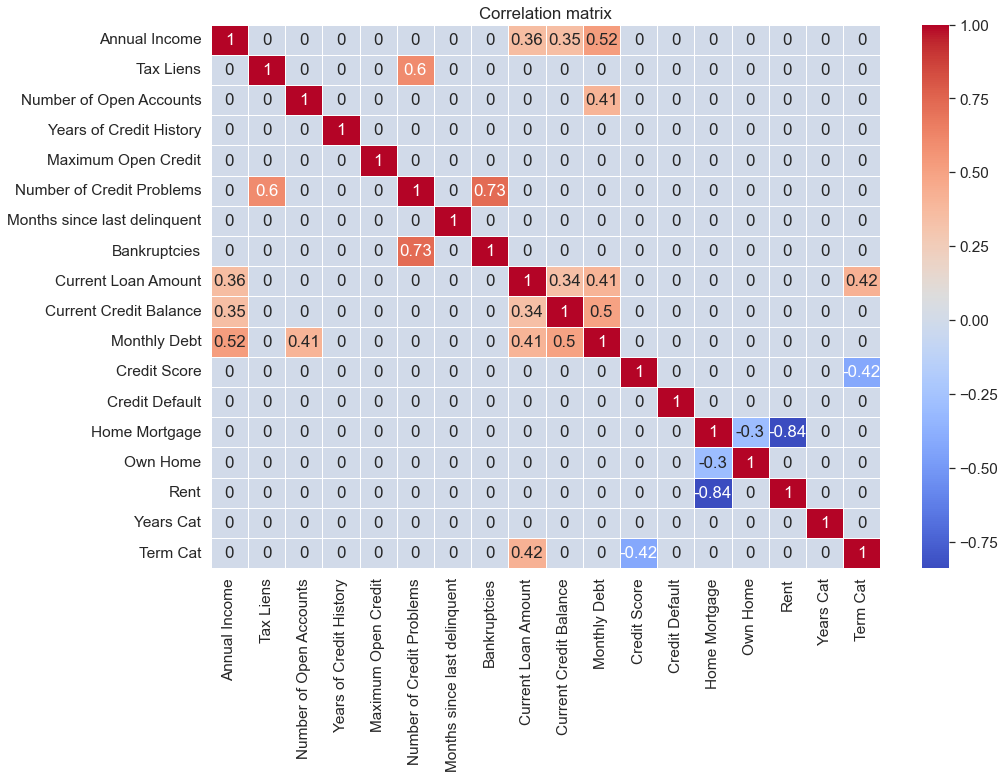

In [1579]:
import seaborn as sns
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df_train.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

<span style="color:blue">*Сразу видно, что, например, банкротство связано с кредитными проблемами, ежегодный доход коррелирует с ежемесячным долгом, а наличие ипотеки связано с отсутствием аренды жилья.*</span>

---

### Анализ целевой переменной

In [1580]:
df_train['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

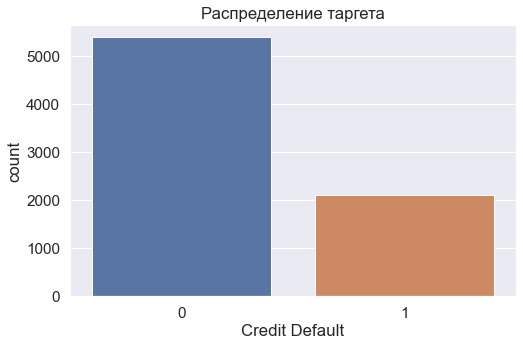

In [1581]:
plt.figure(figsize=(8, 5))

sns.countplot(x='Credit Default', data=df_train)

plt.title('Распределение таргета')
plt.show()

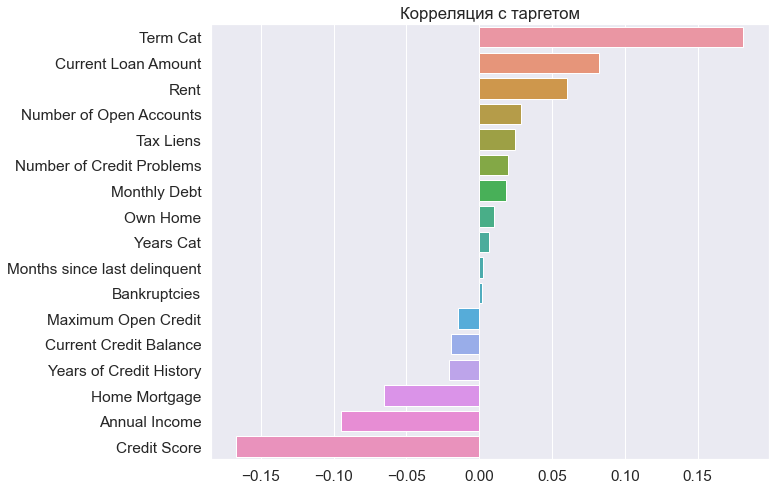

In [1582]:
features = df_train.columns.drop('Credit Default').tolist()
corr_with_target = df_train[features + ['Credit Default']].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Корреляция с таргетом')
plt.show()

<span style="color:blue">*Видно, что больше всех с целевой переменной коррелирует Term Cat.*</span>

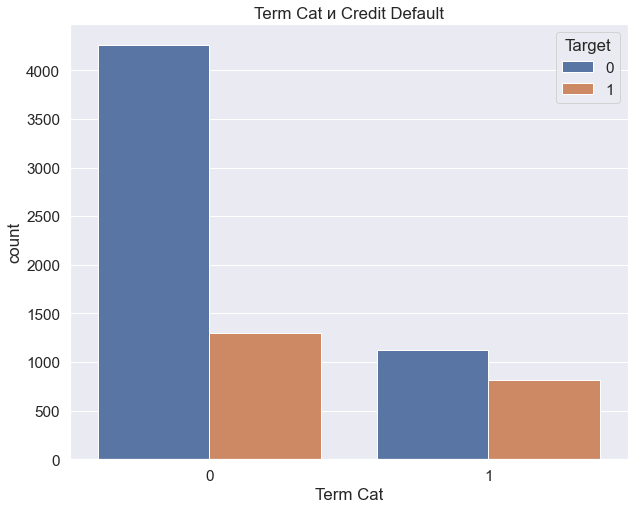

In [1583]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Term Cat", hue="Credit Default", data=df_train)
plt.title('Term Cat и Credit Default')
plt.legend(title='Target', loc='upper right')

plt.show()

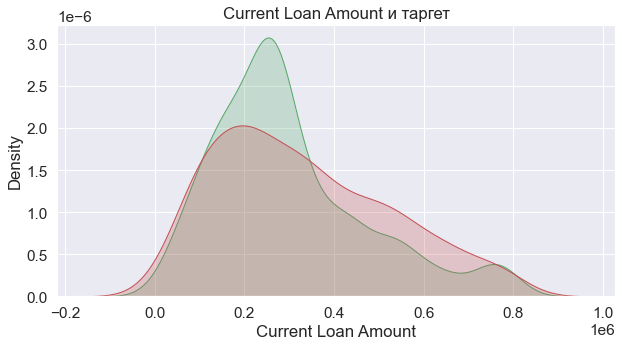

In [1584]:
term_cat_with_target_s = df_train[['Current Loan Amount', 'Credit Default']].sample(1000)
term_cat_s = term_cat_with_target_s['Current Loan Amount']
term_cat_target_0 = term_cat_s[term_cat_with_target_s['Credit Default'] == 0]
term_cat_target_1 = term_cat_s[term_cat_with_target_s['Credit Default'] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(term_cat_target_0, shade=True, label='No default', color='g')
sns.kdeplot(term_cat_target_1, shade=True, label='Default', color='r')

plt.xlabel('Current Loan Amount')
plt.title('Current Loan Amount и таргет')
plt.show()

In [1585]:
from scipy.stats import shapiro
shapiro(term_cat_s)

ShapiroResult(statistic=0.9322614073753357, pvalue=7.139244809548163e-21)

<span style="color:blue">*p-value меньше 0.05, закон распределения отличен от нормального (согласно критерию Шапиро-Уилка). Удостоверимся с помощью критерия Манна-Уитни.*</span>

In [1586]:
from scipy.stats import mannwhitneyu
mannwhitneyu(term_cat_target_0, term_cat_target_1)

MannwhitneyuResult(statistic=99898.5, pvalue=0.03660001732417551)

<span style="color:blue">*Выборки имеют различные распределения и этот признак может быть полезен для определения значения целевой переменной.*</span>

---

### Формирование X_train, y_train, X_test

In [1587]:
df_train.dtypes

Home Ownership                   object
Annual Income                   float64
Years in current job             object
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Credit Default                    int64
Home Mortgage                     uint8
Own Home                          uint8
Rent                              uint8
Years Cat                         int64
Term Cat                          int64
dtype: object

In [1588]:
X_train = df_train.drop(['Home Ownership', 'Years in current job', 'Purpose', 'Term', 'Credit Default'], axis = 1)
y_train = df_train['Credit Default']
X_test = df_test.drop(['Home Ownership', 'Years in current job', 'Purpose', 'Term'], axis = 1)

In [1589]:
X_train.dtypes

Annual Income                   float64
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Home Mortgage                     uint8
Own Home                          uint8
Rent                              uint8
Years Cat                         int64
Term Cat                          int64
dtype: object

---

### Нормализация данных

In [1590]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

---

### Модель (лучше всех - XGBoost)

In [1591]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=21)
model_xgb.fit(X_train_minmax, y_train)

y_train_pred = model_xgb.predict(X_train_minmax)
y_test = model_xgb.predict(X_test_minmax)

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5387
           1       0.98      0.78      0.87      2113

    accuracy                           0.93      7500
   macro avg       0.95      0.89      0.91      7500
weighted avg       0.94      0.93      0.93      7500



In [1592]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model_xgb, file)

prediction = pd.DataFrame(y_test, columns=['y_test']).to_csv('EGrishchenkova_predictions.csv')